In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def plot_investment_performance(tickers, start_date, end_date, initial_investment=100):
    # Set Seaborn style
    sns.set(style="whitegrid", palette="pastel")

    # Download stock data from Yahoo Finance
    stock_data = {}
    for company, ticker in tickers.items():
        try:
            stock_data[company] = yf.download(ticker, start=start_date, end=end_date)
            stock_data[company].reset_index(inplace=True)  # Reset index for easy plotting
        except Exception as e:
            print(f"Error downloading data for {company}: {e}")
            continue

    # Initialize a new DataFrame to store the adjusted close prices for all companies
    investment_performance = pd.DataFrame()

    # Calculate performance of initial investment
    final_values = {}

    for company, data in stock_data.items():
        if not data.empty:
            # Normalize to initial investment on the first available date (close adjusted price)
            first_price = data['Adj Close'].iloc[0]
            investment_performance[company] = (data['Adj Close'] / first_price) * initial_investment
            investment_performance['Date'] = data['Date']  # Add the date column for plotting
            final_values[company] = investment_performance[company].iloc[-1]  # Store final value of investment

    # Create a figure and axis
    plt.figure(figsize=(14, 8))

    # Plot the investment performance for each company
    for company in investment_performance.drop(columns=['Date']).columns:
        sns.lineplot(x=investment_performance['Date'], y=investment_performance[company], label=company, linewidth=2)

    # Customize the title and labels
    plt.title(f'Inversión de ${initial_investment}USD desde {start_date} a {end_date}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('Fecha', fontsize=14, fontweight='bold')
    plt.ylabel('Valor de la inversión (USD)', fontsize=14, fontweight='bold')

    # Rotate the x-axis labels and set their font size
    plt.xticks(rotation=45, fontsize=11)

    # Customize y-axis ticks
    plt.yticks(fontsize=11)

    # Add a legend with a larger font size
    plt.legend(fontsize=13, title='Compañías', title_fontsize='13', loc='upper left', frameon=True)

    # Add vertical and horizontal grid lines
    plt.grid(True, linestyle='--', linewidth=0.7, axis='both')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the final values of the investment
    for company, value in final_values.items():
        print(f"{company}: ${value:.2f}")

    return final_values

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


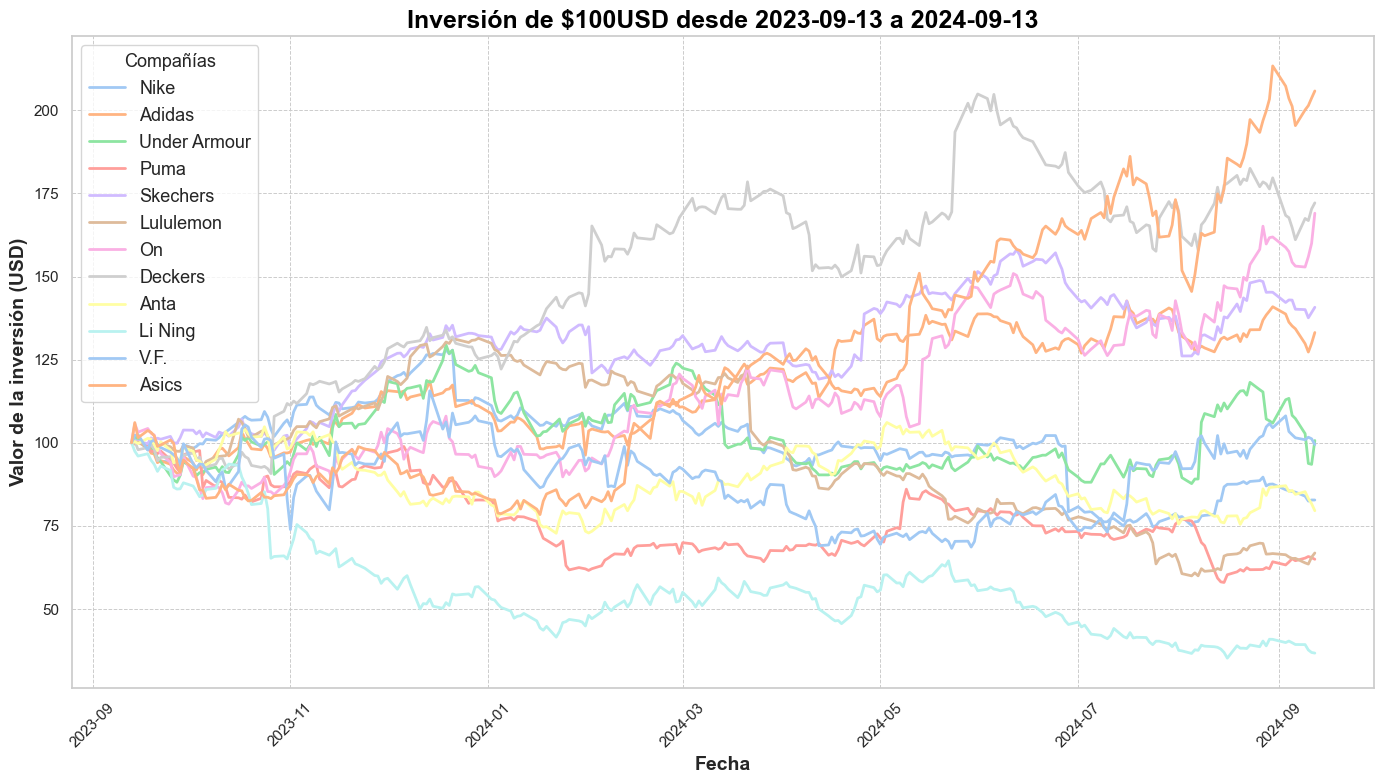

Nike: $82.81
Adidas: $133.17
Under Armour: $100.69
Puma: $64.99
Skechers: $140.75
Lululemon: $66.88
On: $169.02
Deckers: $172.14
Anta: $79.58
Li Ning: $36.78
V.F.: $99.49
Asics: $205.79


In [6]:
# Example usage
tickers = {
    'Nike': 'NKE',
    'Adidas': 'ADDYY',
    'Under Armour': 'UAA',
    'Puma': 'PUM.DE',
    'Skechers': 'SKX',
    'Lululemon': 'LULU',
    'On': 'ONON',
    'Deckers': 'DECK',
    'Anta': 'ANPDY',
    'Li Ning': 'LNNGY',
    'V.F.': 'VFC',
    'Asics': 'ASCCY'
}

start_date = "2023-09-13"
end_date = "2024-09-13"

final_values = plot_investment_performance(tickers, start_date, end_date)